# 0.4 Train SVM model

In [1]:
%matplotlib inline

In [2]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [3]:
import numpy as np
import pandas as pd
import os
import string
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import src.features.build_features as bf

In [4]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [5]:
dataset = pd.read_csv("data/features_resolut_66.csv")

In [6]:
X = dataset.iloc[:, 2:]
X.head(5)

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,2133.0,1822.0,2,280.793937,43,100,0.430000,2.015940,36.964480,12.9523,14.4827,8.2423,24.602960,27.150313,15.926989,798.413592,0.942105,2.992182
1,2500.5,2500.5,1,317.806129,100,78,1.282051,3.119376,40.392216,16.3571,18.2915,9.5064,27.949529,31.186275,16.515143,750.108469,0.948059,3.276012
2,1784.0,1784.0,1,332.048769,53,100,0.530000,2.970852,61.802906,12.8240,14.3613,8.2327,27.807226,30.356000,18.936165,730.766051,0.933914,2.618097
3,1994.5,1046.0,2,164.852812,45,50,0.900000,1.128102,13.625695,13.0020,15.1166,7.3771,25.472204,29.425183,14.573383,688.389046,0.944156,2.584050
4,2838.5,1750.5,2,167.237589,52,55,0.945455,1.007574,9.853236,17.0790,19.7248,10.8707,27.087568,30.780326,17.441261,743.034168,0.953584,3.408798


In [7]:
y = dataset.iloc[:,1]
y.head(5)

0    9
1    9
2    9
3    9
4    9
Name: label, dtype: int64

## Cross validational split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 140)

In [10]:
from sklearn import preprocessing

In [11]:
X_train_std = (X_train - X_train.mean()) / X_train.std()
X_test_std = (X_test - X_train.mean()) / X_train.std()

In [12]:
X_train_std.std()

area                    1.0
largest_area            1.0
number_of_elems         1.0
perimeter               1.0
physiological_length    1.0
physiological_width     1.0
aspect_ratio            1.0
rectangularity          1.0
circularity             1.0
mean_r                  1.0
mean_g                  1.0
mean_b                  1.0
stddev_r                1.0
stddev_g                1.0
stddev_b                1.0
contrast                1.0
correlation             1.0
entropy                 1.0
dtype: float64

In [13]:
X_test_std.std()

area                    0.996547
largest_area            0.989208
number_of_elems         1.044431
perimeter               0.977775
physiological_length    0.994973
physiological_width     0.988690
aspect_ratio            0.971646
rectangularity          0.697465
circularity             0.839502
mean_r                  0.984665
mean_g                  0.986807
mean_b                  0.995641
stddev_r                0.956705
stddev_g                0.959727
stddev_b                0.977888
contrast                0.969105
correlation             0.903285
entropy                 0.994924
dtype: float64

In [14]:
X_train_std

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
737,-0.124005,-0.062174,0.586072,0.708890,1.366138,-0.035763,0.479240,0.200152,0.416683,-0.139902,-0.162197,-0.187849,0.129337,0.107952,0.027719,0.823584,0.289694,0.095948
172,0.246931,0.400817,-0.594612,0.479179,-0.420462,1.301629,-0.792114,-0.209212,-0.101515,0.197084,0.153037,0.931395,0.384949,0.317551,1.439714,0.270389,0.462711,0.368551
1266,1.218550,1.371887,-0.594612,1.332607,0.644626,1.301629,-0.459990,-0.181136,0.062041,0.880873,0.713393,0.783147,0.712975,0.418303,0.897170,1.540840,0.428802,1.297009
1682,-1.427711,-1.262862,-1.775297,-1.313541,-0.867113,-1.908111,8.068075,-0.885115,-1.049923,-1.493640,-1.474287,-1.319117,-1.993620,-1.954798,-1.662659,-1.650311,-3.503394,-1.529175
1761,-1.002054,-0.887125,0.586072,0.041834,0.369765,-0.604154,0.462629,0.806228,1.428057,-1.030391,-1.044782,-0.827383,-0.940870,-0.990227,-0.608420,0.418070,-0.356833,-0.912074
2477,1.289562,1.442860,-0.594612,1.617915,1.366138,1.301629,-0.235004,-0.017291,0.233608,0.994123,0.912686,0.850918,0.546218,0.458631,0.539997,1.690292,0.443703,1.394411
2825,-0.904307,-0.984399,0.586072,-1.164758,-1.622982,-0.737893,-0.949247,-0.656694,-0.768860,-0.932790,-0.960733,-0.827994,-0.725179,-0.817272,-0.763466,-0.759626,0.204567,-0.940205
3815,0.670500,-0.180740,0.586072,-0.692741,-0.489178,-0.537284,-0.211196,-0.652474,-0.857581,0.585144,0.708758,0.317886,0.519596,0.720467,-0.037481,0.016157,0.549201,0.439390
1275,-0.556763,-0.402425,-0.594612,-0.310656,-0.626609,0.532629,-0.721988,-0.009500,-0.241625,-0.442733,-0.444213,-0.710385,0.093189,0.088058,-0.689368,-0.872015,0.418183,-0.541589
1051,0.175919,0.329844,-0.594612,0.735847,0.369765,1.000716,-0.470469,0.064966,0.167307,0.376357,0.373331,-0.376876,0.701378,0.717988,-0.355838,-0.081105,0.470890,0.135117


## Applying SVM classifier model

In [15]:
from sklearn import svm

In [16]:
clf = svm.SVC(kernel='rbf', C=1000, decision_function_shape='ovo', gamma=0.01, class_weight='balanced')
clf.fit(X_train_std, y_train)

SVC(C=1000, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
y_pred = clf.predict(X_test_std)

In [18]:
from sklearn import metrics

In [19]:
metrics.f1_score(y_test, y_pred, average='micro')

0.7926914968376669

In [20]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80       119
           1       0.78      0.81      0.79       159
           2       0.81      0.75      0.77       157
           3       0.86      0.90      0.88       126
           4       0.94      0.88      0.91       167
           5       0.75      0.90      0.82        58
           6       0.61      0.71      0.65        68
           7       0.72      0.76      0.74        72
           8       0.96      0.90      0.93       173
           9       0.86      0.84      0.85        81
          10       0.78      0.61      0.69       171
          11       0.42      0.54      0.47        72

   micro avg       0.79      0.79      0.79      1423
   macro avg       0.77      0.79      0.78      1423
weighted avg       0.80      0.79      0.79      1423



## GridSearch

In [75]:
def gridSearch(DataSet, LabelSet):
    #define logspace/interval from which c and gamma valuest are computed and saved to a dictionary to be passed as a parameter
    #c from 1e-2 to 1e5
    C_range = np.logspace(-1, 5, 6)
    #gamma from 1e-5 to 1e3
    gamma_range = np.logspace(-1, 5, 6)
    param_grid = dict(gamma=gamma_range, C=C_range)
    
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
    grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv, n_jobs=1)
    grid.fit(DataSet, LabelSet)
    
    return grid

In [76]:
svm_grid = gridSearch(X_train_std, y_train)

In [77]:
y_pred_svm_grid = svm_grid.predict(X_test_std)

In [78]:
metrics.f1_score(y_test, y_pred_svm_grid, average='micro')

0.8378947368421052

In [79]:
svm_grid.best_params_

{'C': 6309.57344480193, 'gamma': 0.1}

## Save model

In [85]:
import pickle

In [86]:
# save the classifier
with open('/Users/anacriel/plant_seed_classification/models/svm_back_color_add_area.pkl', 'wb') as fid:
    pickle.dump(clf, fid) 

## Checking test images

In [21]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [22]:
import src.visualization.visualize as vs
import src.features.build_features as bfeatures
import cv2
import mahotas as mt
from matplotlib import pyplot as plt
from src.data.make_dataset import create_dataset_added_features

In [23]:
data_dir = '../data/raw/'
test_image_dir = os.path.join(data_dir, 'test')

In [24]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [25]:
images, titles = vs.read_images(test_image_dir, data_type='test')

794


In [26]:
features_of_img = create_dataset_added_features(images, titles, kind='title')

In [27]:
features_of_img.drop(columns='title', inplace=True)

In [28]:
features_of_img

,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,2982.5,2982.5,1,367.462983,100,90,1.111111,3.017603,45.273778,21.6409,24.4378,9.3922,34.118396,38.161713,16.096782,866.136704,0.937873,3.742537
0,252.5,252.5,1,165.923879,45,52,0.865385,9.267327,109.032609,3.0031,2.9372,1.6354,15.601067,15.301237,8.654274,527.244941,0.773465,0.665563
0,2529.0,2529.0,1,253.279219,100,47,2.127660,1.858442,25.365901,18.9709,22.6849,8.4935,32.088211,38.409197,15.366065,545.535615,0.956917,3.221622
0,1363.5,1363.5,1,264.634557,67,100,0.670000,4.913825,51.361532,11.1817,13.2484,5.6584,27.153174,32.024133,14.456283,553.426582,0.929138,1.948496
0,4408.5,4408.5,1,364.776692,100,100,1.000000,2.268345,30.183063,27.9325,33.6793,16.6554,32.493657,38.596109,23.667958,789.136892,0.956359,5.174131
0,86.0,40.0,3,29.656854,11,7,1.571429,0.895349,10.227081,1.4997,1.6175,0.8902,11.285912,12.086563,6.700787,298.631760,0.688765,0.309052
0,3687.5,3687.5,1,256.208150,100,54,1.851852,1.464407,17.801387,26.3920,30.6229,10.3632,34.347447,39.568944,14.751525,489.018820,0.969570,4.064760
0,2465.5,2465.5,1,413.404107,83,100,0.830000,3.366457,69.317768,21.1335,21.4102,10.9647,36.574295,37.215461,20.884072,909.497269,0.928554,3.778998
0,1851.5,1851.5,1,308.634556,77,100,0.770000,4.158790,51.447631,15.5444,17.4920,4.6232,31.730484,35.557088,11.737300,648.942309,0.935928,2.573711
0,0.0,4.0,0,11.656854,4,5,0.800000,0.000000,0.000000,0.1887,0.1944,0.1097,4.154286,4.270551,2.407004,73.234128,0.371503,0.049692


In [29]:
features_of_img = (features_of_img - X_train.mean()) / X_train.std()

In [37]:
y_test_pred = clf.predict(features_of_img)

In [38]:
y_test_pred[0]

1

In [39]:
len(titles)

794

In [40]:
len(features_of_img)

794

In [41]:
cols = {'file':titles, 'species':y_test_pred}

In [42]:
submission_df = pd.DataFrame(data=cols)

In [43]:
submission_df.iloc[520]

file       e721c6ac8.png
species               10
Name: 520, dtype: object

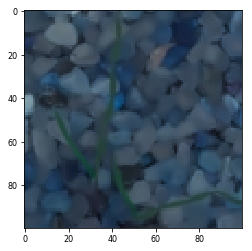

In [47]:
plt.imshow(images[])

In [45]:
submission_df

,file,species
0,1b490196c.png,1
1,85431c075.png,10
2,506347cfe.png,2
3,7f46a71db.png,0
4,668c1007c.png,3
5,71f5323c5.png,11
6,1f3f44563.png,5
7,beebe5f4e.png,2
8,780defa2e.png,8
9,df521c0c0.png,10


In [41]:
submission_df.to_csv("data/8th_submission.csv")

In [42]:
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }

In [43]:
mapping_rev = {v : k for k, v in mapping.items()}

In [44]:
mapping_rev

{0: 'Sugar beet',
 1: 'Fat Hen',
 2: 'Scentless Mayweed',
 3: 'Charlock',
 4: 'Small-flowered Cranesbill',
 5: 'Maize',
 6: 'Shepherds Purse',
 7: 'Common wheat',
 8: 'Common Chickweed',
 9: 'Cleavers',
 10: 'Loose Silky-bent',
 11: 'Black-grass'}

In [45]:
submission_df.species.replace(mapping_rev, inplace=True); submission_df

,file,species
0,1b490196c.png,Scentless Mayweed
1,85431c075.png,Loose Silky-bent
2,506347cfe.png,Scentless Mayweed
3,7f46a71db.png,Scentless Mayweed
4,668c1007c.png,Charlock
5,71f5323c5.png,Common wheat
6,1f3f44563.png,Maize
7,beebe5f4e.png,Loose Silky-bent
8,780defa2e.png,Scentless Mayweed
9,df521c0c0.png,Black-grass


In [46]:
submission_df.to_csv("/Users/anacriel/submission.csv", index=False)